## Imports

In [59]:
# Torch
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms

# General
import matplotlib
import numpy as np

## Dataset

### Config

In [60]:
CLASSES = 10

### Preparation

In [61]:
# Load dataset
test_set = dsets.MNIST(root='./data', train=False, download=True)
train_set = dsets.MNIST(root='./data', train=True, download=True)

In [62]:
# Data as numpy
test_data = test_set.data.numpy()
train_data = train_set.data.numpy()

# Labels as numpy
test_labels = test_set.targets.numpy()
train_labels = train_set.targets.numpy()

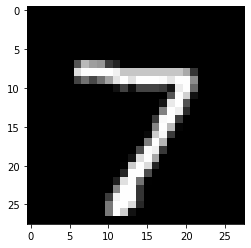

In [63]:
# Plot sample data
import matplotlib.pyplot as plt
%matplotlib inline

img = test_data[0]
plt.imshow(img, cmap='gray')

In [64]:
# Flatten train and test data
test_flattened = test_data.reshape((test_data.shape[0], 784))
train_flattened = train_data.reshape((train_data.shape[0], 784))

print("Test shape (flattened): ", test_flattened.shape)
print("Train shape (flattened): ", train_flattened.shape)

np.array([train_flattened[0, :]]).shape

Test shape (flattened):  (10000, 784)
Train shape (flattened):  (60000, 784)


(1, 784)

In [65]:
# One hot encoding
one_hot_test = np.eye(CLASSES)[test_labels]
one_hot_train = np.eye(CLASSES)[train_labels]

print("Test labels: ", one_hot_test.shape)
print("Train labels: ", one_hot_train.shape)

Test labels:  (10000, 10)
Train labels:  (60000, 10)


## Network

### Config

In [193]:
BATCH = 20
HIDDEN = 15
DEBUG = False
EPSILON = 0.005
EPOCHS = 200 * 3000 # 5 passes over data

### Routines

In [233]:
# Sigmoid function for the
# activation between input
# and hidden layer, as well
# as hidden to output layer
# activation
def sigmoid(x, deriv=False):
    if(deriv == True):
        return x*(1-x)
    
    return 1/(1+np.exp(-x))

# Softmax activation function
# to normalize the output as
# a vector of probabilities
# for every single possible
# class
def softmax(x, deriv=False):
    if(deriv == True):
        return x*(1-x)

    x = x - x.max(axis=1, keepdims=True)
    y = np.exp(x)
    sigma = y / y.sum(axis=1, keepdims=True)
    return sigma

# Feed forward operation
def feed_forward(input_batch, w1, w2):
    # Dot products
    a1 = sigmoid(np.dot(input_batch,w1))
    a2 = softmax(np.dot(a1,w2))
    
    return input_batch, a1, a2

# Evaluate learnt weights
def evaluate(test, w1, w2, labels):
    # Metrics
    corrects, wrongs = 0, 0
    
    # Evaluate on test set
    for i in range(len(test)):
        # Add dimension
        data = np.array([test[i]])
        
        # Run feedforward
        _, _, res = feed_forward(data, w1, w2)
        
        # Check result
        res_max = res.argmax()
        if res_max == labels[i]:
            corrects += 1
        else:
            wrongs += 1
            
    return corrects, wrongs

def confusion_matrix(test_data, w1, w2, labels):
        # Confusion matrix
        cm = np.zeros((10, 10), int)
        
        for i in range(len(test_data)):
            # Test sample
            data = np.array([test_data[i]])
            
            # Get result
            _, _, res = feed_forward(data, w1, w2)
            res_max = res.argmax()
            target = labels[i]
            cm[res_max, int(target)] += 1
            
        return cm  

### Training

In [208]:
# Fix random seed
np.random.seed(1)

# Weights
w1 = 2 * np.random.random((784, HIDDEN)) - 1
w2 = 2 * np.random.random((HIDDEN, 10)) - 1

# Biases
# b0 = 2 * np.random.random((784, HIDDEN)) - 1
# b1 = 2 * np.random.random((HIDDEN, 10)) - 1

for epoch in range(EPOCHS):
    # Index
    idx = epoch % 3000
    
    # Feed forward process
    input_batch = train_flattened[(idx * BATCH):((idx + 1) * BATCH), :]
    a0, a1, a2 = feed_forward(input_batch, w1, w2)
    
    if DEBUG:
        print("A0 shape: ", a0.shape)
        print("A1 shape: ", a1.shape)
        print("A2 shape: ", a2.shape)
    
    # Compute mean error
    y = one_hot_train[(idx * BATCH):((idx + 1) * BATCH), :]
    
    if DEBUG:
        print("Error shape: ", error)
        
    # Compute DELTA2
    delta2 = (a2 - y)
    
    # Compute dw2
    dw2 = np.dot(a1.T, delta2)
    
    # Compute db2
    
    # Compute DELTA1
    delta1 = np.dot(delta2, w2.T) * sigmoid(a1, True)
    
    # Compute dw1
    dw1 = np.dot(delta1.T, a0).T
    
    #TODO: Compute db1
    
    if DEBUG:
        print("DELTA2 shape: ", delta2.shape)
        print("dW2 shape: ", dw2.shape)
        print("DELTA1 shape: ", delta1.shape)
        print("dW1 shape: ", dw1.shape)
        
    # Print MSE
    if (epoch % 3000) == 0:
        print("MSE: ", np.mean(np.abs(delta2)))
    
    # Update weights
    w2 -= (EPSILON * dw2)
    w1 -= (EPSILON * dw1)
    
    #TODO: Update basis

/Users/dailand10/opt/miniconda3/envs/cvl/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


MSE:  0.17007931527908882
MSE:  0.12353610580655977
MSE:  0.1119906943744497
MSE:  0.09428694689075388
MSE:  0.09825786445928379
MSE:  0.07818498681729946
MSE:  0.06772180104319186
MSE:  0.0885970940120519
MSE:  0.07827135201176776
MSE:  0.08779400808436087
MSE:  0.08505031119899652
MSE:  0.09380642163277733
MSE:  0.08848356533717615
MSE:  0.09799443278349793
MSE:  0.09213039391675917
MSE:  0.07915860967702669
MSE:  0.09917527949238565
MSE:  0.09681059434603868
MSE:  0.0907442786137883
MSE:  0.09969421043431538
MSE:  0.07764437747915692
MSE:  0.08500499468042388
MSE:  0.11281493840172875
MSE:  0.09184315214046755
MSE:  0.09091693850908418
MSE:  0.08970867215786658
MSE:  0.08260710701089527
MSE:  0.10440887729817817
MSE:  0.10162417020456037
MSE:  0.07438243044491358
MSE:  0.08785178409473109
MSE:  0.07312345938600477
MSE:  0.08010638174398188
MSE:  0.08350152351937468
MSE:  0.06751536658595596
MSE:  0.07374108239849202
MSE:  0.07637880724752633
MSE:  0.07124838530368184
MSE:  0.0699493

## Evaluation

### Accuracy

In [209]:
c, w = evaluate(test_flattened, w1, w2, test_labels)

/Users/dailand10/opt/miniconda3/envs/cvl/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


In [212]:
print("The model accuracay is: ", c / (c + w))

The model accuracay is:  0.803


### Confusion Matrix

In [ ]:
cm = confusion_matrix(test_flattened, w1, w2, test_labels)

/Users/dailand10/opt/miniconda3/envs/cvl/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


In [235]:
cm

array([[ 903,    0,   13,   34,    4,   28,   30,   11,    6,    5],
       [   0, 1083,   27,   20,    3,    7,   12,   84,   25,   13],
       [  22,    2,  748,   20,    4,   10,   19,   21,    3,    4],
       [   3,   10,   21,  832,    0,  263,    5,   14,  126,   12],
       [   1,    2,   11,    4,  871,    3,   20,   15,   20,  111],
       [  24,    5,   41,   22,    0,  518,   62,    8,  107,   16],
       [  18,    6,   53,    0,   26,   18,  808,    0,   15,    6],
       [   6,    0,   18,   10,    4,    7,    1,  830,    3,   38],
       [   2,   27,   93,   62,   14,   32,    1,    3,  656,   23],
       [   1,    0,    7,    6,   56,    6,    0,   42,   13,  781]])